In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
# Set random seed for reproducible results
tf.random.set_seed(42)

In [11]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

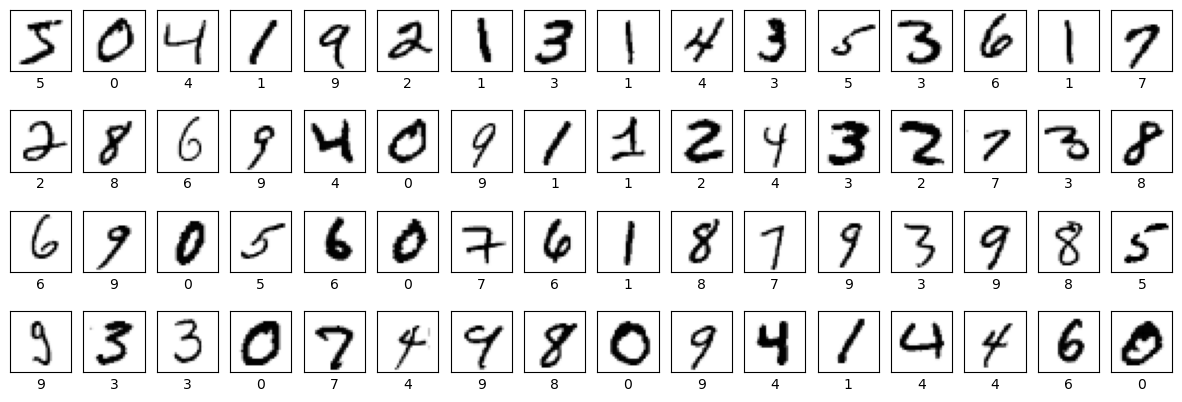

In [12]:
plt.figure(figsize=(15,5))
for i in range(16*4):
    plt.subplot(4,16,i+1)
    plt.imshow(X_train[i], cmap="Greys")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("{}".format(str(y_train[i])))
plt.show()

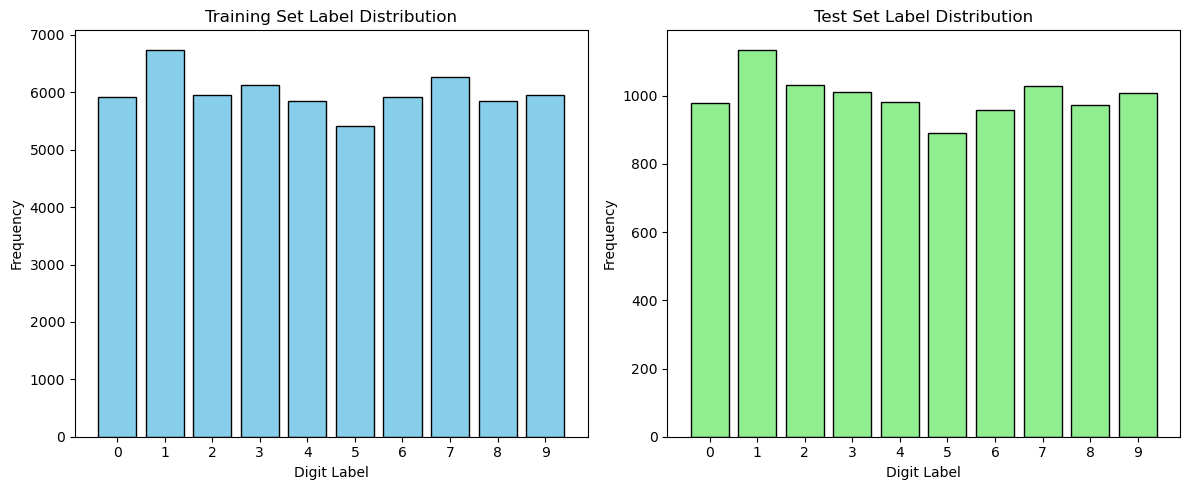

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training data label distribution
axes[0].hist(y_train, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
axes[0].set_title('Training Set Label Distribution')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(10))

# Test data label distribution
axes[1].hist(y_test, bins=range(11), align='left', rwidth=0.8, color='lightgreen', edgecolor='black')
axes[1].set_title('Test Set Label Distribution')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(10))

plt.tight_layout()
plt.show()

/var/folders/pd/b5p_5ztd53db9z2yxmnpvclw0000gn/T/ipykernel_5392/935664131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


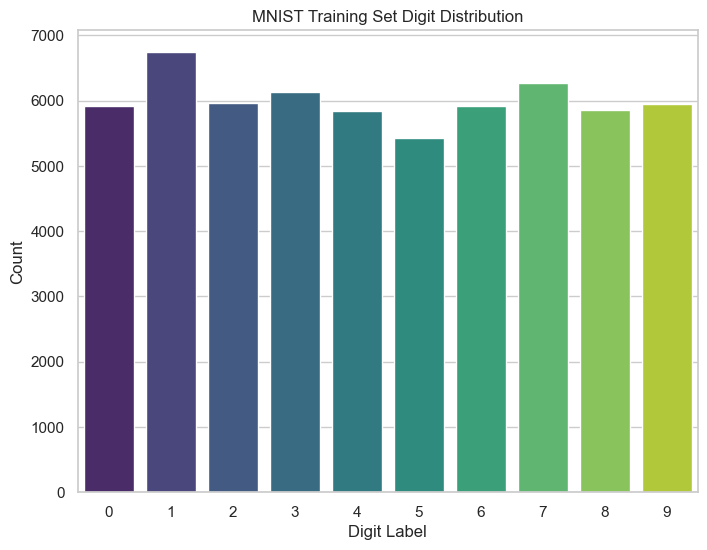

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="viridis")

plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title("MNIST Training Set Digit Distribution")
plt.show()

# DL

In [18]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/Users/hasan/miniconda3/envs/ai-accelerator/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
e = model.fit(X_train, y_train, epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 953us/step - accuracy: 0.8585 - loss: 2.6856
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9067 - loss: 0.3926
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9277 - loss: 0.2940
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.9368 - loss: 0.2511
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.9439 - loss: 0.2240
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9477 - loss: 0.2094
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - accuracy: 0.9499 - loss: 0.1977


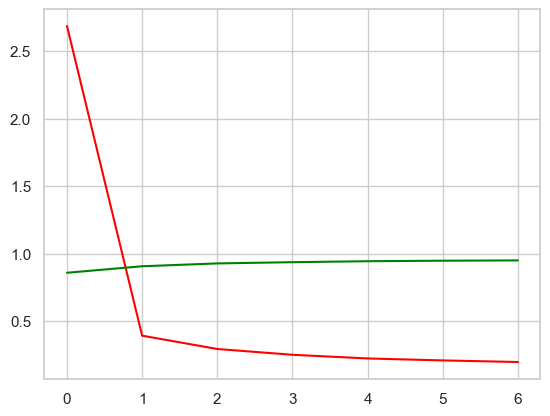

In [20]:
plt.plot(e.history['loss'], c='red')
plt.plot(e.history['accuracy'], c='green') # <- Note minor change here from `acc` to `accuracy`.
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.9449 - loss: 0.2865


[0.286493718624115, 0.9448999762535095]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

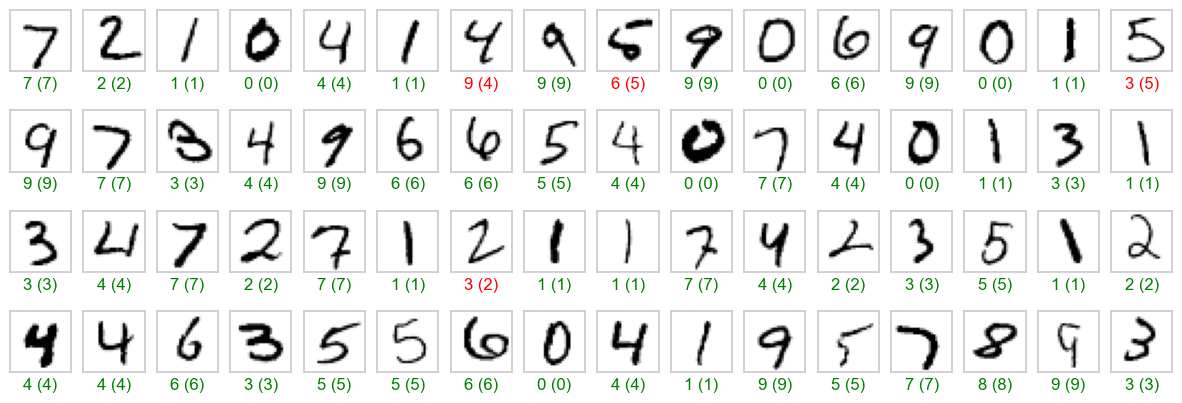

In [22]:
plt.figure(figsize=(15, 5))
for i in range(16 * 4):
    plt.subplot(4, 16, i + 1)
    
    # Reshape the input to 2D shape expected by the model (28x28)
    input_data = X_test[i].reshape(1, 28, 28)  # Reshaping to (1, 28, 28)
    p = model.predict(input_data)
    pred = p.argmax()
    
    plt.imshow(X_test[i].reshape(28, 28), cmap="Greys")  # Reshaping for display
    plt.xticks([])
    plt.yticks([])
    
    if pred == y_test[i]:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} ({})".format(str(pred), str(y_test[i])), color=color)    
plt.show()
